<a href="https://colab.research.google.com/github/Ariiiff/Text-Summarization/blob/main/bert_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.6 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-gpu==1.5
# import keras==2.2.4
import numpy as np  
import pandas as pd 
import re           
import os
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
!pip install wget
import wget
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.5 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==1.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=9b21d56215cb5a07a50195ee9ee625dd9c4e92eb7f481490f4bb317d5338c27a
  Stored in 

In [ ]:
from transformers import BertTokenizer, TFBertModel

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Masking, Attention, Dot, Concatenate, Activation, Softmax

In [ ]:
tokenizer = BertTokenizer.from_pretrained('sagorsarker/bangla-bert-base')
bert_model = TFBertModel.from_pretrained('sagorsarker/bangla-bert-base')

Some layers from the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at sagorsarker/bangla-bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Define the vocabulary size
vocab_size = tokenizer.vocab_size

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
# read text file into pandas DataFrame
articles = pd.read_table("/content/gdrive/MyDrive/Bangla_News_Article_Dataset/article.txt")
# display DataFrame
print(articles.iloc[100])

# read text file into pandas DataFrame
summaries = pd.read_table("/content/gdrive/MyDrive/Bangla_News_Article_Dataset/summary.txt")
# display DataFrame
print(summaries.iloc[100])

স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান নির্বাহী কর্মকর্তা হিসেবে দায়িত্ব পেয়েছেন আবরার এ আনোয়ার।    বঙ্গবন্ধুর স্বদেশ প্রত্যাবর্তন দিবস উপলক্ষে সোমবার রাজধানীর সোহরাওয়ার্দী উদ্যানে সমাবেশ করতে পুলিশের অনুমতি পেয়েছে ক্ষমতাসীন আওয়ামী লীগ।
Name: 100, dtype: object
স্ট্যান্ডার্ড চার্টার্ডের নতুন সিইও আবরার    আওয়ামী লীগকে ঢাকায় সমাবেশের অনুমতি পুলিশের
Name: 100, dtype: object


In [ ]:
dataframe = pd.concat([articles, summaries], axis=1, sort=False)
dataframe.columns = ['article', 'summary']

In [ ]:
new_df = dataframe.dropna()

In [ ]:
new_df

,article,summary
0,রাজধানী থেকে চামড়া শিল্পগুলো সাভারে স্থানান্তরে সিইটিপি ছাড়া সরকার সব কাজ শেষ করেছে বলে জানিয়েছেন শিল্পমন্ত্রী আমির হোসেন আমু।,মার্চের মধ্যে সাভারে চামড়া শিল্পের সিইটিপি: মন্ত্রী
1,দেশীয় শিল্প বিকাশে সরকারের সব ধরনের উদ্যোগ অব্যাহত রাখার আশ্বাস দিয়েছেন শিল্পমন্ত্রী আমির হোসেন আমু।,ওয়ালটন কারখানায় শিল্পমন্ত্রী
2,একীভূত হতে চলেছে অনলাইনে শ্রেণিবদ্ধ বিজ্ঞাপন সেবাদাতা দুই প্রতিষ্ঠান এখানেই ডটকম এবং ওএলএক্স।,একীভূত হচ্ছে এখানেই ডটকমওএলএক্স
3,যাত্রীবাহী একটি বাসে আগুন দেওয়ার আধা ঘণ্টার মধ্যে এই ঘটনায় জড়িত অভিযোগে নড়াইলের পৌর মেয়র ও জেলা বিএনপির সাংগঠনিক সম্পাদক জুলফিকার আলীকে আটক করেছে পুলিশ।,বাসে আগুন: নড়াইলের পৌর মেয়র গ্রেপ্তার
4,অবরোধে বাস পোড়ানোর অভিযোগে মাগুরা জেলা বিএনপি সভাপতি কবির মুরাদসহ ৪২ নেতাকর্মীর বিরুদ্ধে একটি মামলা করেছে পুলিশ।,মাগুরায় বাসে আগুন: বিএনপি নেতাদের নামে মামলা
...,...,...
19090,"মাঝারি থেকে দূরপাল্লার ক্ষেপণাস্ত্রের সফল পরীক্ষার কথা জানানোর পর উত্তর কোরিয়া ফের জাতিসংঘ ও যুক্তরাষ্ট্রের হুঁশিয়ারি উপেক্ষা করে যে কোনও সময়, যে কোনও স্থান থেকে এ ধরনের পরীক্ষা চালিয়ে যাওয়ার হুমক...",যেকোনও সময় ফের ক্ষেপণাস্ত্র পরীক্ষার হুমকি উত্তর কোরিয়ার
19091,বিশ্বকবি রবীন্দ্রনাথ ঠাকুরের ১৫৬তম ও জাতীয় কবি কাজী নজরুল ইসলামের ১১৮তম জন্মজয়ন্তী উপলক্ষে আরব আমিরাতের আবুধাবিতে বাংলাদেশ দূতাবাস আলোচনাসভা ও সাংস্কৃতিক অনুষ্ঠানের আয়োজন করেছে।,আবুধাবিতে রবীন্দ্রনজরুল জন্মজয়ন্তী পালন
19092,এশিয়ান কন্টিনেন্টাল দাবা চ্যাম্পিয়নশিপের চতুর্থ রাউন্ডে নিজেদের বিভাগে ড্র করেছেন গ্র্যান্ডমাস্টার এনামুল হোসেন রাজীব ও মহিলা ইন্টারন্যাশনাল মাস্টার শামীমা আক্তার লিজা।,চীনে রাজীব ও লিজার ড্র
19093,শাখার পূর্ণাঙ্গ কমিটি করতে না পারার জন্য বড় ভাইদের দাবির সমন্বয় করতে না পারাকে কারণ দেখিয়েছেন চট্টগ্রাম বিভাগের কয়েকটি জেলার ছাত্রলীগ নেতারা।,বড় ভাইদের দাবি মেটাতে হিমশিম ছাত্রলীগ


In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
clean_articles = []
for art in new_df["article"] : 
  clean_articles.append(preprocessing(art))


clean_summaries = []
for sum in new_df["summary"] : 
  clean_summaries.append(preprocessing(sum))

In [ ]:
data1 = pd.read_excel('/content/gdrive/MyDrive/Bangla_News_Article_Dataset/stopwords_bangla (1).xlsx')
stopwords = data1['words'].tolist() 

In [ ]:
def stopwordRemoval(text):    
    x=str(text)
    l=x.split() 

    stm=[elem for elem in l if elem not in stopwords] 
    
    out=' '.join(stm) 

    return str(out)

In [ ]:
clean_article = []
for art in clean_articles : 
  clean_article.append(stopwordRemoval(art))


clean_summary = []
for sum in new_df["summary"] : 
  clean_summary.append(stopwordRemoval(sum))

In [ ]:
new_df['clean_article'] = clean_article
new_df['clean_summary'] = clean_summary

In [ ]:
new_df['clean_summary'] = new_df['clean_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [ ]:
for i in range(5):
    print("Article:",new_df['clean_article'][i])
    print("Summary:",new_df['clean_summary'][i])
    print("\n")

Article: রাজধানী চামড়া শিল্পগুলো সাভারে স্থানান্তরে সিইটিপি সরকার জানিয়েছেন শিল্পমন্ত্রী আমির হোসেন আমু
Summary: _START_ মার্চের সাভারে চামড়া শিল্পের সিইটিপি: মন্ত্রী _END_


Article: দেশীয় শিল্প বিকাশে সরকারের ধরনের উদ্যোগ অব্যাহত রাখার আশ্বাস শিল্পমন্ত্রী আমির হোসেন আমু
Summary: _START_ ওয়ালটন কারখানায় শিল্পমন্ত্রী _END_


Article: একীভূত চলেছে অনলাইনে শ্রেণিবদ্ধ বিজ্ঞাপন সেবাদাতা প্রতিষ্ঠান ডটকম ওএলএক্স
Summary: _START_ একীভূত ডটকমওএলএক্স _END_


Article: যাত্রীবাহী বাসে আগুন আধা ঘণ্টার ঘটনায় জড়িত অভিযোগে নড়াইলের পৌর মেয়র জেলা বিএনপির সাংগঠনিক সম্পাদক জুলফিকার আলীকে আটক পুলিশ
Summary: _START_ বাসে আগুন: নড়াইলের পৌর মেয়র গ্রেপ্তার _END_


Article: অবরোধে বাস পোড়ানোর অভিযোগে মাগুরা জেলা বিএনপি সভাপতি কবির মুরাদসহ নেতাকর্মীর বিরুদ্ধে পুলিশ
Summary: _START_ মাগুরায় বাসে আগুন: বিএনপি নেতাদের নামে _END_




In [ ]:
new_df = new_df.drop(labels=4289, axis=0)

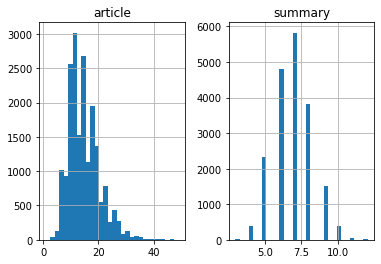

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in new_df['clean_article'] :
      text_word_count.append(len(i.split()))

for i in new_df['clean_summary'] :
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'article':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [ ]:
print("max word in summary : ", max(summary_word_count))
print("max word in article : ", max(text_word_count))

print("min word in summary : ", min(summary_word_count))
print("min word in article : ", min(text_word_count))

max word in summary :  12
max word in article :  49
min word in summary :  3
min word in article :  1


In [ ]:
# Define the maximum length of input and output sequences
max_input_len = 50
max_output_len = 15
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(new_df['clean_article'], new_df['clean_summary'],test_size=0.1,random_state=0) 

In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_input_len, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_input_len, padding='post')

In [ ]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_output_len, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_output_len, padding='post')

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
from keras import backend as K 
K.clear_session() 

# Encoder 
encoder_input = Input(shape=(max_input_len,))
encoder_mask = Masking(mask_value=0)(encoder_input)
encoder_bert_emb = Embedding(vocab_size, bert_model.config.hidden_size, mask_zero=True)(encoder_mask)


# Define the first LSTM layer
encoder_lstm1 = LSTM(768, return_sequences=True, return_state=True, name="encoder_lstm1")
encoder_outputs1, state_h1, state_c1 = encoder_lstm1(encoder_bert_emb)

# Define the second LSTM layer
encoder_lstm2 = LSTM(768, return_sequences=True, return_state=True, name="encoder_lstm2")
encoder_outputs2, state_h2, state_c2 = encoder_lstm2(encoder_outputs1)

# Define the third LSTM layer
encoder_lstm3 = LSTM(768, return_sequences=True, return_state=True, name="encoder_lstm3")
encoder_outputs3, state_h3, state_c3 = encoder_lstm3(encoder_outputs2)

# The final encoder outputs will be the outputs from the last LSTM layer
encoder_outputs = encoder_outputs3
encoder_states = [state_h3, state_c3]

In [ ]:
decoder_input = Input(shape=(None,))
decoder_mask = Masking(mask_value=0)(decoder_input)
decoder_emb = Embedding(vocab_size, bert_model.config.hidden_size, mask_zero=True)(decoder_mask)

decoder_lstm = LSTM(bert_model.config.hidden_size, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, return_state=True)
decoder_output, _, _ = decoder_lstm(decoder_emb, initial_state=encoder_states)

In [ ]:
#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_output]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_output, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(vocab_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_input, decoder_input], decoder_outputs) 
model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 masking (Masking)              (None, 50)           0           ['input_1[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 50, 768)      78316800    ['masking[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                              

In [ ]:
encoder_inputs_train = x_tr
decoder_inputs_train = y_tr[:,:-1]
decoder_outputs_train = y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:]

In [ ]:
encoder_inputs_test = x_val
decoder_inputs_test = y_val[:,:-1]
decoder_outputs_test = y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]

In [ ]:
decoder_outputs_train.shape

(17184, 14, 1)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# Train the model
history = model.fit([encoder_inputs_train, decoder_inputs_train], decoder_outputs_train,
          batch_size=32,
          epochs=10,
          callbacks=[early_stopping],
          validation_data=([encoder_inputs_test, decoder_inputs_test], decoder_outputs_test))

Epoch 1/10
537/537 [==============================] - 228s 382ms/step - loss: 7.1255 - accuracy: 0.2699 - val_loss: 6.1733 - val_accuracy: 0.3161
Epoch 2/10
537/537 [==============================] - 175s 326ms/step - loss: 6.5179 - accuracy: 0.2936 - val_loss: 6.0046 - val_accuracy: 0.3155
Epoch 3/10
537/537 [==============================] - 172s 319ms/step - loss: 6.3604 - accuracy: 0.2953 - val_loss: 5.9706 - val_accuracy: 0.3194
Epoch 4/10
537/537 [==============================] - 172s 319ms/step - loss: 6.2321 - accuracy: 0.2976 - val_loss: 5.9750 - val_accuracy: 0.3228
Epoch 5/10
537/537 [==============================] - 175s 326ms/step - loss: 6.1181 - accuracy: 0.3010 - val_loss: 5.9921 - val_accuracy: 0.3100
Epoch 6/10
537/537 [==============================] - 174s 325ms/step - loss: 5.9820 - accuracy: 0.3050 - val_loss: 5.9518 - val_accuracy: 0.3164
Epoch 7/10
537/537 [==============================] - 174s 323ms/step - loss: 5.8379 - accuracy: 0.3082 - val_loss: 5.9253 -

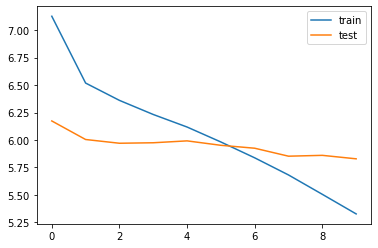

In [ ]:
#Visualizing Loss 
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [ ]:
latent_dim = 768
# encoder inference
encoder_model = Model(inputs=encoder_input,outputs=[encoder_outputs, state_h3, state_c3])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_input_len,latent_dim))

# Get the embeddings of the decoder sequence
decoder_mask = Masking(mask_value=0)(decoder_input)
dec_emb2 = Embedding(vocab_size, bert_model.config.hidden_size, mask_zero=True)(decoder_mask)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_input] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
#Building Dictionary for Source Vocabulary
reverse_target_word_index = y_tokenizer.index_word 
reverse_source_word_index = x_tokenizer.index_word 
target_word_index = y_tokenizer.word_index

In [ ]:
#Function defining the implementation of inference process
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    # print('input_seq: {}, e_out: {} '.format(input_seq,e_out))
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        # print("sampled_token:",sampled_token)
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_output_len-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # stop_condition = True
        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
#Functions to convert an integer sequence to a word sequence for summary as well as reviews 
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
#Functions to convert an integer sequence to a word sequence for summary as well as reviews 
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
#Summaries generated by the model
for i in range(20):
  print("Article:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1, max_input_len)))
  print("\n")

Article: শি জিনপিংয়ের সফরে বাংলাদেশকে ঋণ সহায়তা চুক্তি চীন বাণিজ্যিক ভিত্তিতে বলছে বেইজিং 
Original summary: সুদের ঋণ বলছে চীন 
1/1 [==============================] - 0s 28ms/step
Predicted summary:  রাষ্ট্রপতির রাষ্ট্রপতির সাক্ষাৎ


Article: ন্যায্য অধিকারের দাবিতে আন্দোলনরত বাঙালিকে স্তব্ধ আগের রাতে পাকিস্তানি বাহিনী নেমেছিল গণহত্যা দিবস হিসেবে আন্তর্জাতিকভাবে পালনের দাবি উঠেছে 
Original summary: আন্তর্জাতিক স্বীকৃতি দাবি 
1/1 [==============================] - 0s 26ms/step
Predicted summary:  মৃত্যু পথে পথে


Article: সিরাজগঞ্জের তাড়াশে গৃহবধূকে হত্যার অপরাধে স্বামীসহ দুজনের যাবজ্জীবন কারাদণ্ড 
Original summary: হত্যা মামলায় ২ যাবজ্জীবন 
1/1 [==============================] - 0s 47ms/step
Predicted summary:  ফেনীতে ধর্ষণ মামলার হত্যার


Article: কুমিল্লায় দলের ডাকা হরতাল চলাকালে আওয়ামী লীগ বিএনপি সমর্থকদের ব্যাপক সংঘর্ষ 
Original summary: কুমিল্লায় আ লীগবিএনপি সংঘর্ষ আহত ১০ 
1/1 [==============================] - 0s 42ms/step
Predicted summary:  বাসে হামলায় হামলায় আহত আহত


Article:

In [ ]:
print("Article:",seq2text(x_val[113]))
print("Original summary:",seq2summary(y_val[113]))
print("Predicted summary:",decode_sequence(x_val[113].reshape(1,max_input_len)))

Article: তথ্য প্রযুক্তি বিভাগের আইসিটি স্টার্টআপ চ্যালেঞ্জ জিতল তরুণদের উদ্ভাবনী প্রকল্প 
Original summary: স্টার্টআপ চ্যালেঞ্জ জিতল ২০ উদ্ভাবনী প্রকল্প 
1/1 [==============================] - 0s 109ms/step
Predicted summary:  টাকা বিভাগের


In [ ]:
#BLEU Score of Training set
#n-gram individual BLEU
from nltk.translate.bleu_score import sentence_bleu
one_gram = []
two_gram = []
for i in range(0,100):
  reference = seq2summary(y_val[i])
  candidate = decode_sequence(x_val[i].reshape(1, max_input_len))
  one_gram.append(sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
  two_gram.append(sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))

print(reference)
print(candidate)

1/1 [==============================] - 0s 27ms/step
দর্শক ম্যাচ জিতে ফাইনালে ঘানা 
 বাংলাদেশের শীর্ষে শীর্ষে


In [ ]:
print("Individual 1-gram: ", np.average(one_gram))
print("Individual 2-gram: ", np.average(two_gram))

Individual 1-gram:  0.3288571004707416
Individual 2-gram:  8.373716760823882e-155


In [76]:
!pip install rouge
from rouge import Rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
# Evaluate summarization using ROUGE metrics
def evaluate_summarization(reference_summary, generated_summary):
    rouge = Rouge()
    scores = rouge.get_scores(generated_summary, reference_summary)
    return scores[0]['rouge-1']['f'], scores[0]['rouge-2']['f'], scores[0]['rouge-l']['f']


In [78]:
f1_score_1 = []
f1_score_2 = []
f1_score_l = []
for i in range(0,100):
  reference = seq2summary(y_val[i])
  candidate = decode_sequence(x_val[i].reshape(1, max_input_len))
  score_1, score_2, score_l = evaluate_summarization(reference, candidate)
  f1_score_1.append(score_1)
  f1_score_2.append(score_2)
  f1_score_l.append(score_l)


print("ROUGE-1 F1-score:", np.average(f1_score_1))
print("ROUGE-2 F1-score:", np.average(f1_score_2))
print("ROUGE-L F1-score:", np.average(f1_score_l))

1/1 [==============================] - 0s 28ms/step
ROUGE-1 F1-score: 0.07022294273904556
ROUGE-2 F1-score: 0.009499999858250003
ROUGE-L F1-score: 0.07022294273904556
